In [41]:
# conventional way to import pandas
import pandas as pd
# conventional way to import seaborn
import seaborn as sns
# conventional way to import numpy
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/ISLR/Smarket.csv", index_col=0)

data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


We will split the data into data before 2005 and after. Next we will make our tranining data.

In [42]:
import statsmodels.api as sm
from scipy import stats
from patsy import dmatrices

MarketAfter_2005 = data.query('Year >= 2005')
MarketBefore_2005 = data.query('Year < 2005')

y_train, X_train = dmatrices('Direction~Lag1+Lag2', MarketBefore_2005, return_type = 'dataframe')

y_test, X_test = dmatrices('Direction~Lag1+Lag2', MarketAfter_2005, return_type = 'dataframe')

Import K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
neigh = KNeighborsClassifier(n_neighbors= 3) # use n_neighbors to change the # of tune the performance of KNN

KNN_fit = neigh.fit(X_train.iloc[:,1:3], y_train.iloc[:,1]) #learning the projection matrix

X_test_labels = KNN_fit.predict(X_test.iloc[:,1:3])
X_test_prob   = KNN_fit.predict_proba(X_test.iloc[:,1:3]) 

np.mean(y_test.iloc[:,1]==X_test_labels) 


0.53174603174603174

See what we can get fom the KNeighborsClassifier

In [45]:
dir(neigh) # use dir command to check what KNN offers

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_init_params',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'outputs_2d_',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

This is an attempt at ploting. But it didn't work so well. In spider or pycham is shows a image, but i don't think it is useful right now.

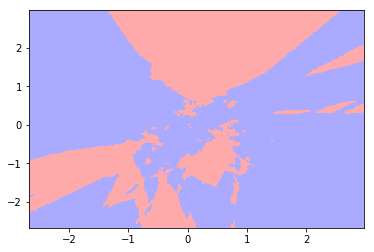

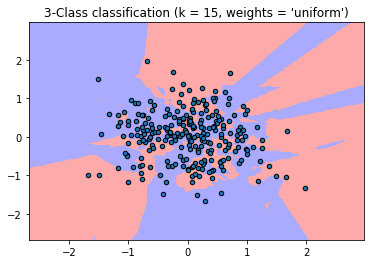

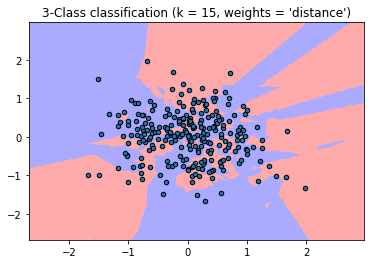

In [47]:
X = X_test.iloc[:,1:3]
y = y_test.iloc[:,1:3]
h = .02  # step size in the mesh

# Create color maps

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(3)
    clf.fit(X, y.values.ravel())

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = X.min() - 1, X.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min[1], x_max[1], h), np.arange(y_min[1], y_max[1], h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (15, weights))

plt.show()